# Importations

## Packages

In [1]:
import requests
import pandas as pd
import io

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Inégalités sociales face aux maladies chroniques (ER 1243)

In [2]:
url_drees = "https://data.drees.solidarites-sante.gouv.fr/explore/dataset/er_inegalites_maladies_chroniques/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B"

urlData = requests.get(url_drees).content
rawData = pd.read_csv(io.StringIO(urlData.decode('utf-8')), sep = ";")
rawData

,type,varTaux,varTauxLib,I_cat,cat,catLib,varPartition,valPartition,varGroupage,valGroupage,varPoids,poids1,poidsTot,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
0,prevalence,TOP_CVAOMI_IND,Artériopathie oblitérante du membre inférieur,0,SUP_CV_CAT,Maladies cardioneurovasculaires,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,13621.000499,1.374418e+06,0.009910,0.014240,0.013046,0.015435,0.014738,0.013555,0.015921
1,prevalence,TOP_CVCORON_CHR,Maladie coronaire chronique,0,SUP_CV_CAT,Maladies cardioneurovasculaires,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,30886.502030,1.374418e+06,0.022472,0.031912,0.030194,0.033631,0.033026,0.031317,0.034736
2,prevalence,TOP_CVVALVE_IND,Maladie valvulaire,0,SUP_CV_CAT,Maladies cardioneurovasculaires,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,6482.669891,1.374418e+06,0.004717,0.006956,0.006101,0.007810,0.007021,0.006193,0.007848
3,prevalence,TOP_IRMMHER_IND,Maladies métaboliques héréditaires ou amylose,0,SUP_INFRARVIH_CAT,Maladies inflammatoires ou rares ou VIH ou SIDA,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,2080.348333,1.374418e+06,0.001514,0.001515,0.001182,0.001847,0.001693,0.001332,0.002054
4,prevalence,TOP_NAUTRES_IND,Autres affections neurologiques,0,SUP_NEUDEG_CAT,Maladies neurologiques ou dégénératives,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,4457.531100,1.374418e+06,0.003243,0.003526,0.002986,0.004066,0.003521,0.003009,0.004032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46171,prevalence,TOP_RTRANS_CHR,Suivi de transplantation rénale,0,SUP_RIRCT_CAT,Insuffisance rénale chronique terminale,FISC_REG_S,76,NaN,NaN,POIDS_FIDELI_S,7112.975655,1.165354e+07,0.000610,0.000610,0.000541,0.000679,0.000610,0.000541,0.000679
46172,prevalence,SUP_CV_CAT,Maladies cardioneurovasculaires,1,SUP_CV_CAT,Maladies cardioneurovasculaires,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,83399.961403,1.374418e+06,0.060680,0.085818,0.083292,0.088344,0.087454,0.084920,0.089988
46173,prevalence,SUP_INFRARVIH_CAT,Maladies inflammatoires ou rares ou VIH ou SIDA,1,SUP_INFRARVIH_CAT,Maladies inflammatoires ou rares ou VIH ou SIDA,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,21016.687362,1.374418e+06,0.015291,0.017164,0.015987,0.018340,0.017821,0.016652,0.018991
46174,prevalence,SUP_PSYPAT_CAT,Maladies psychiatriques,1,SUP_PSYPAT_CAT,Maladies psychiatriques,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,89880.210265,1.374418e+06,0.065395,0.074454,0.072089,0.076819,0.074301,0.072029,0.076572


In [13]:
list(set(rawData['varPartition']))

['FISC_REG_S', nan, 'SEXE']

In [14]:
list(set(rawData['varGroupage']))

[nan,
 'FISC_NIVVIEM_E2015_S_moy_10',
 'EAR_GS_S',
 'classeAge10',
 'SEXE',
 'EAR_DIPLR_S']

In [17]:
rawData_incidence = rawData[(rawData['varGroupage'] == 'FISC_NIVVIEM_E2015_S_moy_10')
                           &(rawData['varPartition'] == 'FISC_REG_S')
                           ]
rawData_incidence

,type,varTaux,varTauxLib,I_cat,cat,catLib,varPartition,valPartition,varGroupage,valGroupage,varPoids,poids1,poidsTot,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
0,prevalence,TOP_CVAOMI_IND,Artériopathie oblitérante du membre inférieur,0,SUP_CV_CAT,Maladies cardioneurovasculaires,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,13621.000499,1.374418e+06,0.009910,0.014240,0.013046,0.015435,0.014738,0.013555,0.015921
1,prevalence,TOP_CVCORON_CHR,Maladie coronaire chronique,0,SUP_CV_CAT,Maladies cardioneurovasculaires,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,30886.502030,1.374418e+06,0.022472,0.031912,0.030194,0.033631,0.033026,0.031317,0.034736
2,prevalence,TOP_CVVALVE_IND,Maladie valvulaire,0,SUP_CV_CAT,Maladies cardioneurovasculaires,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,6482.669891,1.374418e+06,0.004717,0.006956,0.006101,0.007810,0.007021,0.006193,0.007848
3,prevalence,TOP_IRMMHER_IND,Maladies métaboliques héréditaires ou amylose,0,SUP_INFRARVIH_CAT,Maladies inflammatoires ou rares ou VIH ou SIDA,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,2080.348333,1.374418e+06,0.001514,0.001515,0.001182,0.001847,0.001693,0.001332,0.002054
4,prevalence,TOP_NAUTRES_IND,Autres affections neurologiques,0,SUP_NEUDEG_CAT,Maladies neurologiques ou dégénératives,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,4457.531100,1.374418e+06,0.003243,0.003526,0.002986,0.004066,0.003521,0.003009,0.004032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45972,prevalence,TOP_PTRENFA_IND,Troubles psychiatriques ayant débuté dans l'en...,0,SUP_PSYPAT_CAT,Maladies psychiatriques,FISC_REG_S,75,FISC_NIVVIEM_E2015_S_moy_10,10,POIDS_FIDELI_S,1018.880834,9.325170e+05,0.001093,0.001587,0.001068,0.002106,0.001509,0.001016,0.002001
46172,prevalence,SUP_CV_CAT,Maladies cardioneurovasculaires,1,SUP_CV_CAT,Maladies cardioneurovasculaires,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,83399.961403,1.374418e+06,0.060680,0.085818,0.083292,0.088344,0.087454,0.084920,0.089988
46173,prevalence,SUP_INFRARVIH_CAT,Maladies inflammatoires ou rares ou VIH ou SIDA,1,SUP_INFRARVIH_CAT,Maladies inflammatoires ou rares ou VIH ou SIDA,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,21016.687362,1.374418e+06,0.015291,0.017164,0.015987,0.018340,0.017821,0.016652,0.018991
46174,prevalence,SUP_PSYPAT_CAT,Maladies psychiatriques,1,SUP_PSYPAT_CAT,Maladies psychiatriques,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,89880.210265,1.374418e+06,0.065395,0.074454,0.072089,0.076819,0.074301,0.072029,0.076572


In [35]:
grouped_df = rawData_incidence.groupby('valGroupage').mean()
grouped_df = grouped_df.sort_index()
grouped_df

/tmp/ipykernel_5939/1397242405.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = rawData_incidence.groupby('valGroupage').mean()


,I_cat,poids1,poidsTot,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
valGroupage,,,,,,,,,,
1,0.211538,7733.668727,776130.544229,0.009891,0.012316,0.011052,0.013579,0.012644,0.011395,0.013892
10,0.211538,8908.068233,745586.715981,0.012017,0.009492,0.008276,0.010708,0.009560,0.008424,0.010696
2,0.211538,9211.359270,745003.095540,0.011656,0.012692,0.011389,0.013995,0.012746,0.011462,0.014030
3,0.211538,9910.046387,741146.072507,0.012376,0.012495,0.011184,0.013806,0.012465,0.011163,0.013767
4,0.211538,9646.126323,744043.869106,0.011869,0.011959,0.010602,0.013315,0.012037,0.010686,0.013388
5,0.211538,9224.140473,750963.638177,0.011424,0.011582,0.010222,0.012943,0.011707,0.010351,0.013064
6,0.211538,8898.453792,754545.468109,0.011081,0.011323,0.009956,0.012690,0.011436,0.010064,0.012809
7,0.211538,8587.725216,757391.533269,0.010765,0.011018,0.009668,0.012368,0.011119,0.009768,0.012470
8,0.211538,8645.153658,756574.262605,0.010934,0.010465,0.009184,0.011746,0.010564,0.009286,0.011841


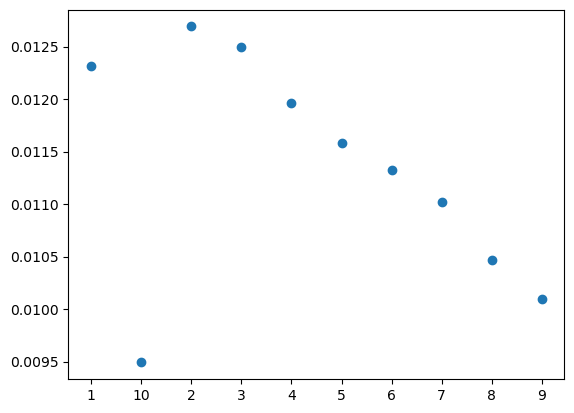

In [23]:
plt.scatter(grouped_df.index, grouped_df['txStandDir'])
plt.show()

In [10]:
pd.pivot(rawData, columns = ['varPartition'], values = ['valPartition', 'valGroupage'])

varGroupage                                  
varPartition         NaN                   FISC_REG_S SEXE
0                    NaN  FISC_NIVVIEM_E2015_S_moy_10  NaN
1                    NaN  FISC_NIVVIEM_E2015_S_moy_10  NaN
2                    NaN  FISC_NIVVIEM_E2015_S_moy_10  NaN
3                    NaN  FISC_NIVVIEM_E2015_S_moy_10  NaN
4                    NaN  FISC_NIVVIEM_E2015_S_moy_10  NaN
...                  ...                          ...  ...
46171                NaN                          NaN  NaN
46172                NaN  FISC_NIVVIEM_E2015_S_moy_10  NaN
46173                NaN  FISC_NIVVIEM_E2015_S_moy_10  NaN
46174                NaN  FISC_NIVVIEM_E2015_S_moy_10  NaN
46175                NaN  FISC_NIVVIEM_E2015_S_moy_10  NaN

[46176 rows x 3 columns]

In [6]:
pd.wide_to_long(rawData, ["A", "B"], i="FISC_NIVVIEM_E2015_S_moy_10", j="SEXE")

KeyError: "None of [Index(['FISC_NIVVIEM_E2015_S_moy_10'], dtype='object')] are in the [columns]"

#### Dictionnaire code régions

In [3]:
dico_regions = {
    '1' : 'Guadeloupe',
    '2' : 'Martinique',
    '3' : 'Guyane',
    '4' : 'La Réunion',
    '6' : 'Mayotte',
    '11' : 'Ile de France',
    '24' : 'Centre val de Loire',
    '27' : 'Bourgogne Franche-Comté',
    '28' : 'Normandie' ,
    '32' : 'Nord pas de Calais Picardie',
    '44' : 'Alsace Champagne Ardenne Lorraine',
    '52' : 'Pays de la Loire',
    '53' : 'bretagne' ,
    '75' : 'Aquitaine Limousin Poitou-Charentes',
    '76' : 'Langeudoc-Roussillon Midi-Pyrénées' ,
    '84' : 'Auvergne Rhône-Alpes' ,
    '93' : 'Procence Alpes Côte d\'Azur' ,
    '94' : 'Corse'
}

In [4]:
set(rawData['valGroupage'])

{'1',
 '10',
 '2',
 '3',
 '30-39',
 '4',
 '40-49',
 '5',
 '50-59',
 '6',
 '60-69',
 '7',
 '70-79',
 '8',
 '80-89',
 '9',
 '<30',
 '>=90',
 'F',
 'M',
 nan}

In [ ]:
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2)

#create boxplot in each subplot
sns.boxplot(data=df, x='team', y='points', ax=axes[0,0])
sns.boxplot(data=df, x='team', y='assists', ax=axes[0,1])
sns.boxplot(data=df, x='team', y='rebounds', ax=axes[1,0])
sns.boxplot(data=df, x='team', y='blocks', ax=axes[1,1])